-Courbes caracteristiques:

$x(t) = at + \xi$

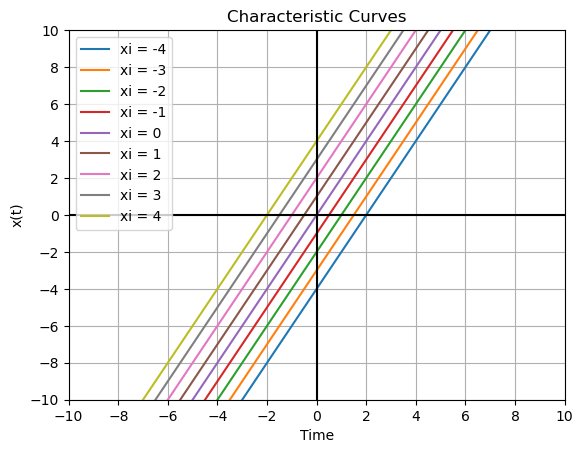

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the values of a and xi
a = 2
xi_values = [-4, -3, -2, -1, 0, 1, 2, 3, 4]

# Define the time range
t = np.linspace(-10, 10, 100)

# Plot the characteristic curves for each xi value
for xi in xi_values:
    x = a * t + xi
    plt.plot(t, x, label=f"xi = {xi}")

# Plot the x and y axes
plt.axhline(0, color='black')
plt.axvline(0, color='black')

plt.xlabel('Time')
plt.ylabel('x(t)')
plt.title('Characteristic Curves')
plt.grid(True)

# Set the x and y axes limits to center at 0
plt.xlim(-10, 10)
plt.ylim(-10, 10)

# Set the x and y axis ticks
plt.xticks(np.arange(-10, 11, 2))
plt.yticks([-10, -5, 0, 5, 10])

# Hide the legend
plt.legend().set_visible(False)

plt.show()


In [12]:
round(CFL*dx/a, 2)

0.05

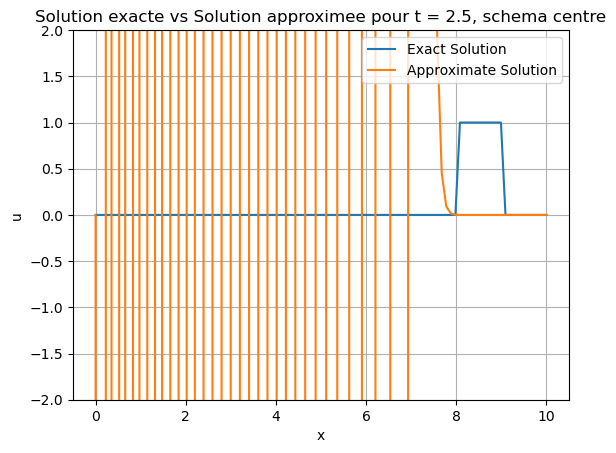

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


def u_0(x):
    if 3 <= x <= 4:
        return 1
    else:
        return 0
    
L = 10
a = 2
N = 100
CFL = 0.99
dx = L/(N-1)
dt = round(CFL*dx/a, 2)

x = np.linspace(0, L, N)

u0 = np.zeros(N)
u0[int(3/dx):int(4/dx)] = 1

u = u0.copy()
un = np.zeros(N)

t = 0
t1 = 2.5

while t <= t1:

    un = u.copy()
    u_exact = u.copy()
    for j in range(1, N-1):
        u[j] = un[j] - a*dt/(2*dx)*(un[j+1]-un[j-1])
        u_exact[j] = u_0(x[j] - a*t1)
    # Conditions aux limites de Dirichlet
    u[0] = u[-1]
    u[-1] = u[-2]

    # Conditions aux limites de Neumann (derivée nulle aux bords)
    u[N-1] = 0
    u_exact[N-1] = 0

    t += dt

u_exact = [u_0(x - a*t1) for x in x]

plt.plot(x, u_exact, label='Exact Solution')
plt.plot(x, u, label='Approximate Solution')
plt.xlabel('x')
plt.ylabel('u')
plt.title('Solution exacte vs Solution approximee pour t = 2.5, schema centre')
plt.legend()
plt.ylim(-2, 2)  # Set y-axis limits
plt.grid(True)  # Add grid
plt.show()

In [26]:
u_exact = [u_0(x - a*t2) for x in x]


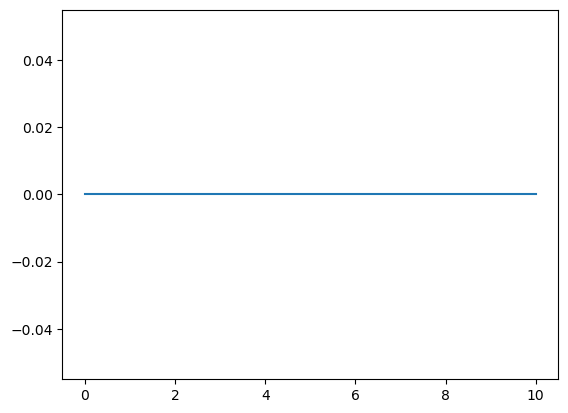

In [27]:
plt.plot(x, u_exact, label='Exact Solution')

C:\Users\Ameck.DOSSEH\AppData\Local\Temp\ipykernel_15612\1290849503.py:27: RuntimeWarning: overflow encountered in scalar multiply
  u[j] = un[j] - a*dt/dx*(un[j]-un[j-1]) + a**2*dt/(2*dx**2)*(un[j-1]-2*un[j]+un[j+1])
C:\Users\Ameck.DOSSEH\AppData\Local\Temp\ipykernel_15612\1290849503.py:27: RuntimeWarning: overflow encountered in scalar add
  u[j] = un[j] - a*dt/dx*(un[j]-un[j-1]) + a**2*dt/(2*dx**2)*(un[j-1]-2*un[j]+un[j+1])
C:\Users\Ameck.DOSSEH\AppData\Local\Temp\ipykernel_15612\1290849503.py:27: RuntimeWarning: overflow encountered in scalar subtract
  u[j] = un[j] - a*dt/dx*(un[j]-un[j-1]) + a**2*dt/(2*dx**2)*(un[j-1]-2*un[j]+un[j+1])
C:\Users\Ameck.DOSSEH\AppData\Local\Temp\ipykernel_15612\1290849503.py:27: RuntimeWarning: invalid value encountered in scalar subtract
  u[j] = un[j] - a*dt/dx*(un[j]-un[j-1]) + a**2*dt/(2*dx**2)*(un[j-1]-2*un[j]+un[j+1])
C:\Users\Ameck.DOSSEH\AppData\Local\Temp\ipykernel_15612\1290849503.py:27: RuntimeWarning: invalid value encountered in scalar a

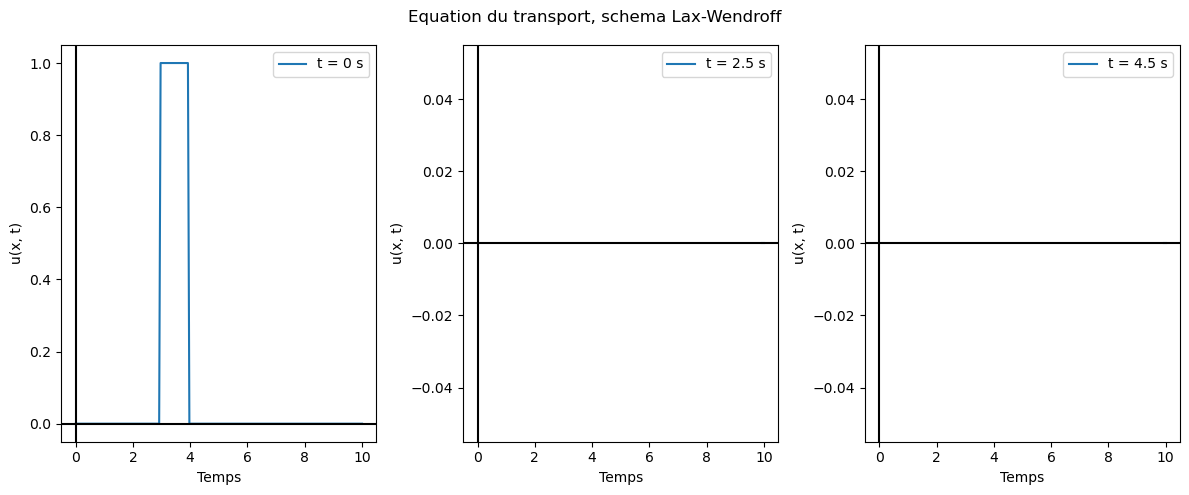

In [4]:
N = 200
CFL = 0.199
dx = L/(N-1)
dt = round(CFL*dx/a, 2)

x = np.linspace(0, L, N)

u0 = np.zeros(N)
u0[int(3/dx):int(4/dx)] = 1

u = u0.copy()
un = np.zeros(N)

t = 0

fig, axs = plt.subplots(1, 3, figsize=(12, 5))

while t < 5:
    if t == 0:
        _=axs[0].plot(x, u, label='t = 0 s')
    elif t == t1:
        _=axs[1].plot(x, u, label='t = 2.5 s')
    elif t == t2:
        _+axs[2].plot(x, u, label='t = 4.5 s')
    un = u.copy()
    for j in range(1, N-1):
        u[j] = un[j] - a*dt/dx*(un[j]-un[j-1]) + a**2*dt/(2*dx**2)*(un[j-1]-2*un[j]+un[j+1])
    u[0] = u[-1]
    u[-2] = u[-1]
    
    t = round(t+dt, 2)
    
_=axs[0].legend()
_=axs[1].legend()
_=axs[2].legend()

for ax in axs:
    _=ax.axhline(0, color='black')
    _=ax.axvline(0, color='black')
    _=ax.set_xlabel('Temps')
    _=ax.set_ylabel('u(x, t)')
    
_=plt.suptitle("Equation du transport, schema Lax-Wendroff")
plt.tight_layout()
plt.show()

In [6]:
# Schema 1 (centré)
L = 10
a = 2
N = 100
CFL = 0.99
dx = L/(N-1)
dt = round(CFL*dx/a, 2)

x = np.linspace(0, L, N)

u0 = np.zeros(N)

u0[int(3/dx):int(4/dx)] = 1

u = u0.copy()

un = np.zeros(N)

t = 0

while t < 2.5:
    un = u.copy()
    for j in range(1, N-1):
        u[j] = un[j] - a*dt/(2*dx)*(un[j+1]-un[j-1])
    u[0] = u[-1]
    u[-2] = u[-1]

    t = round(t+dt, 2)
    
L1_centre = round(np.sum(np.abs(u-u0)*dx), 2)

In [7]:
# Schema 2 (decentre)
N = 100
CFL = 0.99
dx = L/(N-1)
dt = round(CFL*dx/a, 2)

x = np.linspace(0, L, N)

u0 = np.zeros(N)
u0[int(3/dx):int(4/dx)] = 1

u = u0.copy()

un = np.zeros(N)

t = 0

while t < 2.5:
    un = u.copy()
    for j in range(1, N):
        u[j] = un[j] - a*dt/dx*(un[j]-un[j-1])
    u[0] = u[-1]
    u[-2] = u[-1]
    
    t = round(t+dt, 2)
    
L1_decentre = round(np.sum(np.abs(u-u0)*dx), 2)

In [8]:
# Schema 3 (Lax-Friedrichs)
N = 100
CFL = 0.99
dx = L/(N-1)
dt = round(CFL*dx/a, 2)

x = np.linspace(0, L, N)

u0 = np.zeros(N)
u0[int(3/dx):int(4/dx)] = 1

u = u0.copy()

un = np.zeros(N)

t = 0

while t < 2.5:
    un = u.copy()
    for j in range(1, N-1):
        u[j] = 0.5*(un[j-1]+un[j+1]) - a*dt/(2*dx)*(un[j+1]-un[j-1])
    u[0] = u[-1]
    u[-2] = u[-1]

    t = round(t+dt, 2)
    
L1_Lax_Friedrichs = round(np.sum(np.abs(u-u0)*dx), 2)

In [9]:
# Schema 4 (Lax-Wendroff)

N = 100

CFL = 0.99

dx = L/(N-1)

dt = round(CFL*dx/a, 2)

x = np.linspace(0, L, N)

u0 = np.zeros(N)

u0[int(3/dx):int(4/dx)] = 1

u = u0.copy()

un = np.zeros(N)

t = 0

while t < 2.5:
    un = u.copy()
    for j in range(1, N-1):
        u[j] = un[j] - a*dt/dx*(un[j]-un[j-1]) + a**2*dt/(2*dx**2)*(un[j-1]-2*un[j]+un[j+1])
    u[0] = u[-1]
    u[-2] = u[-1]
    
    t = round(t+dt, 2)
    
L1_Lax_Wendroff = round(np.sum(np.abs(u-u0)*dx), 2)

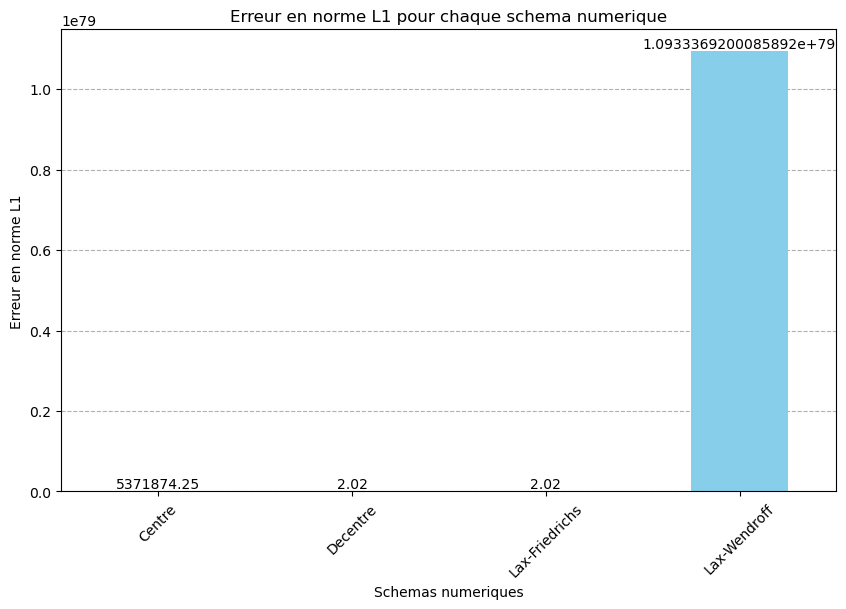

In [11]:
# All errors in pandas series
import pandas as pd

errors = pd.Series([L1_centre, L1_decentre, L1_Lax_Friedrichs, L1_Lax_Wendroff], index=['Centre', 'Decentre', 'Lax-Friedrichs', 'Lax-Wendroff'])

# Plot errors with barplot having error value above bar
ax = errors.plot(kind='bar', figsize=(10, 6), color='skyblue', zorder=2, width=0.5)

for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.1, round(i.get_height(), 2), ha='center', va='bottom')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate xticks by 45 degrees

ax.set_xlabel('Schemas numeriques')
ax.set_ylabel('Erreur en norme L1')
ax.set_title('Erreur en norme L1 pour chaque schema numerique')
ax.grid(axis='y', linestyle='--', zorder=1)
plt.show()